In [80]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [81]:
# Multi-layer Perceptron(MLP)

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [82]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [83]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [84]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 28s 554us/step - loss: 0.5630 - acc: 0.7966 - val_loss: 0.4326 - val_acc: 0.8426
Epoch 2/10
50000/50000 [==============================] - 26s 520us/step - loss: 0.3967 - acc: 0.8566 - val_loss: 0.3920 - val_acc: 0.8567
Epoch 3/10
50000/50000 [==============================] - 25s 508us/step - loss: 0.3549 - acc: 0.8709 - val_loss: 0.3854 - val_acc: 0.8603
Epoch 4/10
50000/50000 [==============================] - 26s 522us/step - loss: 0.3297 - acc: 0.8811 - val_loss: 0.3393 - val_acc: 0.8759
Epoch 5/10
50000/50000 [==============================] - 26s 511us/step - loss: 0.3117 - acc: 0.8861 - val_loss: 0.3232 - val_acc: 0.8823
Epoch 6/10
50000/50000 [==============================] - 33s 654us/step - loss: 0.2986 - acc: 0.8918 - val_loss: 0.3538 - val_acc: 0.8718
Epoch 7/10
50000/50000 [==============================] - 31s 624us/step - loss: 0.2870 - acc: 0.8960 - val_loss: 0.

In [85]:
test_loss, test_acc = net.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 207us/step


In [86]:
# CNN model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
(X_train_CNN,y_train_CNN),(X_test_CNN,y_test_CNN) = fashion_mnist.load_data()

y_train_CNN=to_categorical(y_train_CNN)
y_test_CNN=to_categorical(y_test_CNN)

# preprocessing
X_train_CNN = X_train_CNN.reshape((-1,28,28,1))
X_train_CNN = X_train_CNN/255

X_test = X_test.reshape((-1,28,28,1))
X_test = X_test/255

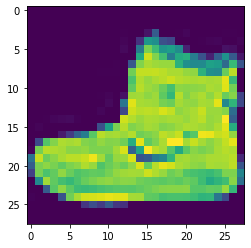

In [87]:
plt.imshow(X_train_CNN[0])

In [88]:
# validation set
X_val_CNN = X_train_CNN[:10000]
partial_X_train_CNN = X_train_CNN[10000:]

y_val_CNN = y_train_CNN[:10000]
partial_y_train_CNN = y_train_CNN[10000:]

In [89]:
nn = models.Sequential()
nn.add(layers.Conv2D(28,(3,3), activation = 'relu',padding = 'same', input_shape = (28,28,1)))
nn.add(layers.MaxPooling2D((2,2)))
nn.add(layers.Conv2D(28,(3,3),activation = 'relu'))
nn.add(layers.MaxPooling2D((2,2)))
nn.add(Flatten())
nn.add(layers.Dense(512,activation = 'relu'))
nn.add(layers.Dropout(0.5))
nn.add(layers.Dense(512,activation = 'relu'))
nn.add(layers.Dropout(0.5))
nn.add(layers.Dense(64,activation ='relu'))
nn.add(Dense(10,activation = 'softmax'))
nn.compile(optimizer = 'nadam', loss = 'categorical_crossentropy',metrics=['acc'])

In [90]:
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 28)        7084      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               516608    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)              

In [91]:
cnn_val = nn.fit(partial_X_train_CNN,partial_y_train_CNN,epochs = 10, batch_size =64, validation_data = (X_val_CNN,y_val_CNN))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.5533 - acc: 0.7940 - val_loss: 0.3608 - val_acc: 0.8629
Epoch 2/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.3385 - acc: 0.8767 - val_loss: 0.3065 - val_acc: 0.8848
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.2867 - acc: 0.8958 - val_loss: 0.2549 - val_acc: 0.9040
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2582 - acc: 0.9052 - val_loss: 0.2488 - val_acc: 0.9079
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2369 - acc: 0.9137 - val_loss: 0.2310 - val_acc: 0.9138
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2173 - acc: 0.9204 - val_loss: 0.2215 - val_acc: 0.9187
Epoch 7/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.2025 - acc: 0.9250 - val_loss: 0.2130 - val_acc

In [92]:
print(cnn_val)

In [93]:
cnn_dict = cnn_val.history

In [94]:
cnn_loss = cnn_dict['loss']
cnn_acc = cnn_dict['acc']

In [95]:
val_dict = val.history

In [96]:
loss = val_dict['loss']
acc = val_dict['acc']

In [98]:
print(val_dict)
print(cnn_dict)

{'val_loss': [0.4326289618492126, 0.3919968074798584, 0.3854014268875122, 0.3392826012611389, 0.3232203230857849, 0.3538125617027283, 0.3050884572982788, 0.3008298610687256, 0.3082763774871826, 0.3295841372013092], 'val_acc': [0.8425999879837036, 0.8567000031471252, 0.8603000044822693, 0.8758999705314636, 0.8823000192642212, 0.8718000054359436, 0.8873999714851379, 0.8916000127792358, 0.8899000287055969, 0.8827000260353088], 'loss': [0.5629877959156037, 0.39666150978088377, 0.3548765708732605, 0.3296530679607391, 0.31168986139297483, 0.2986209012889862, 0.28702956687927245, 0.2762943175506592, 0.2659720191192627, 0.2605211056625843], 'acc': [0.79662, 0.85662, 0.87094, 0.88112, 0.88608, 0.89176, 0.89604, 0.89966, 0.90248, 0.90492]}
{'val_loss': [0.3607802617549896, 0.3065342337608337, 0.25490439658164976, 0.24881122093200683, 0.23102286920547485, 0.2215097762107849, 0.21295810916423796, 0.21374091649055482, 0.23106776161193848, 0.2185673076868057], 'val_acc': [0.8629000186920166, 0.88480

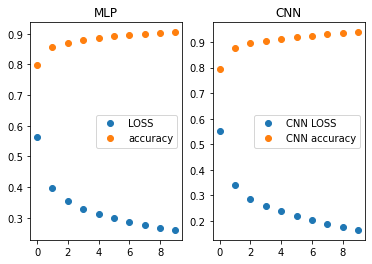

In [101]:
x = np.arange(0,len(cnn_loss))

plt.subplot(121)
plt.title('MLP')
plt.plot(x,loss,'o',label = 'LOSS')
plt.plot(x,acc,'o',label = 'accuracy')
plt.legend()

plt.subplot(122)
plt.title('CNN')
plt.plot(x,cnn_loss,'o',label = 'CNN LOSS')
plt.plot(x,cnn_acc,'o', label = 'CNN accuracy')
plt.legend()


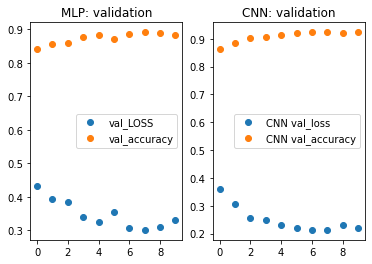

In [100]:
x = np.arange(0,len(cnn_loss))

cnn_val_loss = cnn_dict['val_loss']
cnn_val_acc = cnn_dict['val_acc']

val_loss = val_dict['val_loss']
val_acc = val_dict['val_acc']

plt.subplot(121)
plt.title('MLP: validation')
plt.plot(x,val_loss,'o',label = 'val_LOSS')
plt.plot(x,val_acc,'o',label = 'val_accuracy')
plt.legend()

plt.subplot(122)
plt.title('CNN: validation')
plt.plot(x,cnn_val_loss,'o',label = 'CNN val_loss')
plt.plot(x,cnn_val_acc,'o', label = 'CNN val_accuracy')
plt.legend()


왼쪽 figure는 MLP 모델을 이용하여서 얻은 loss와 accuracy 데이터이고, 오른쪽은 CNN 모델을 이용하여서 얻은 loss와 accuracy이다.
test 데이터 셋으로 얻은 최종 accuarcy는 MLP 방식은 0.904이고, CNN은 0.939이고, loss는 각 모델에 따라 0.261,  0.165로 나왔다.
validation 데이터 셋에서는 acuuracy는 0.882, 0.922이 나왔고, loss는  0.330, 0.219이 나왔다. 단순히 test 셋으로만 비교하여도 CNN방식의 정확도는 크고, 손실율 또한 낮았다. 그리고 validation 데이터 셋이 각 epochs에 따라 MLP는 시행 별 값의 변동이 있는 반변에, CNN는 그 변동이 상대적으로 MLP보단 작고 안정적으로 높은 정확도와 낮은 손실률을 보였다.

In [104]:
# modeling 한 결과로 fashion mnist 데이터 분류
X_test_CNN = X_test_CNN.reshape(-1,28,28,1)
y_pred = nn.predict(X_test_CNN)

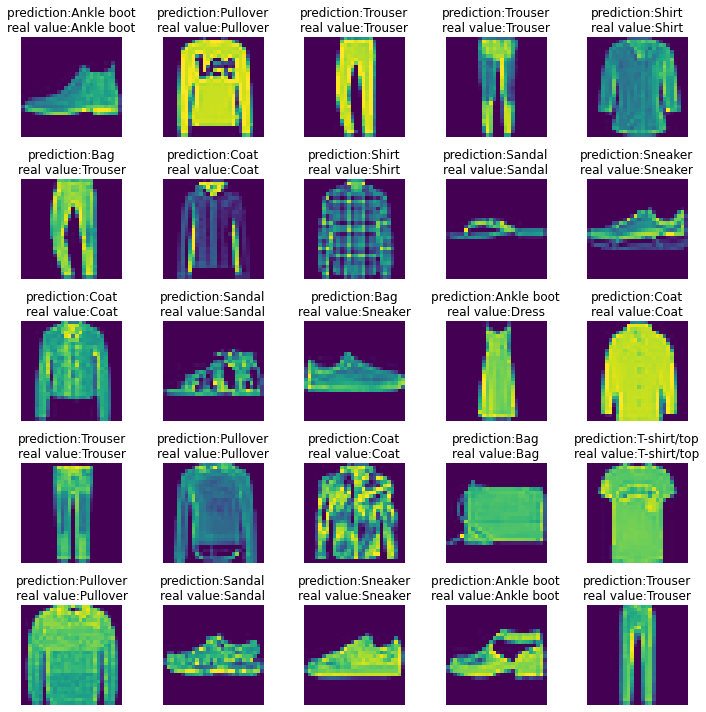

In [105]:
#  해당 결과를 image화를 해서 예측 결과와 image set과 비교해본다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)

axes = []
fig = plt.figure()

for i in range(plt_row*plt_col):
    X_test_plot = X_test_CNN[i].reshape(28,28)
    axes.append(fig.add_subplot(plt_row,plt_col,i+1))
    predict = np.argmax(y_pred[i])
    predict_name = class_names[predict]
    real = np.argmax(y_test[i])
    real_name = class_names[real]
    subplot_title = ("prediction:"+str(predict_name)+"\n"+"real value:"+ str(real_name))
    axes[-1].set_title(subplot_title)
    axes[-1].axis('off')
    plt.imshow(X_test_plot)
    
fig.tight_layout()
plt.show()   

CNN 방식으로 학습한 모델을 적용하여 옷을 분류한 결과로 현재 보여줄 수 있는 25개의 데이터 셋에서는 예측이 다 맞은걸 볼 수 있다.